<a href="https://colab.research.google.com/github/sarahalayan/iris-model-deep-learning/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch


In [1]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [2]:
import numpy as np

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
  def __init__(self, in_features=4,h1=8,h2=9,out_features=3):

    super().__init__() #instantiate our nn.Module
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x


In [4]:
#pick a mannual seed
torch.manual_seed(41)

In [5]:
#create an instance of our model
model=Model()

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import pandas as pd


In [8]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)

In [9]:
my_df



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
my_df['species']=my_df['species'].replace('setosa',0.0)
my_df['species']=my_df['species'].replace('versicolor',1.0)
my_df['species']=my_df['species'].replace('virginica',2.0)

In [11]:
my_df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [14]:
X=my_df.drop('species',axis=1)

In [16]:
y=my_df['species']

In [17]:
#convert X and y to numpy arrays because they are dataframes now
X=X.values
y=y.values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [20]:
#we have to covert numpy arrays to tensor
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [21]:
#how to measure error
criterion=nn.CrossEntropyLoss()
#choose optimizer, and a learning rate lr
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [23]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [24]:
#train

In [26]:
#epochs?
epochs=100
losses=[]
for i in range (epochs):
  y_pred=model.forward(X_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i% 10==0:
    print(f'Epoch;{i} and Loss: {loss}')

  #backward
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch;0 and Loss: 1.1251550912857056
Epoch;10 and Loss: 1.0096259117126465
Epoch;20 and Loss: 0.8157405853271484
Epoch;30 and Loss: 0.585706353187561
Epoch;40 and Loss: 0.3999636471271515
Epoch;50 and Loss: 0.26768800616264343
Epoch;60 and Loss: 0.17942361533641815
Epoch;70 and Loss: 0.12151690572500229
Epoch;80 and Loss: 0.0860118493437767
Epoch;90 and Loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

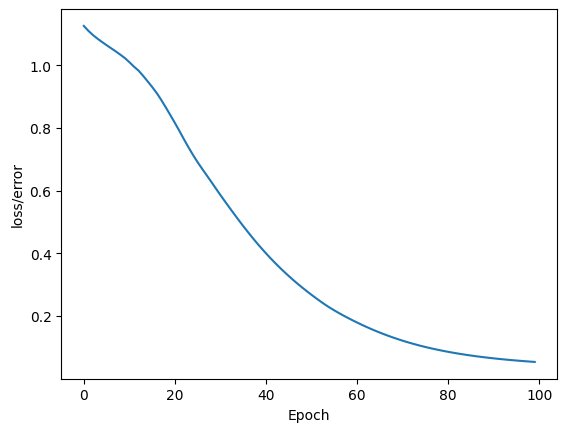

In [27]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [31]:
#evaluate
with torch.no_grad():#turn off back propagation
  y_eval=model.forward(X_test)
  loss=criterion(y_eval,y_test)


In [32]:
loss

tensor(0.1315)

In [35]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data) #y_val is tensor
    print(f'{i+1} {str(y_val)} \t {y_test[i]}')

    if y_val.argmax().item()==y_test[i]:
      correct +=1

1 tensor([-5.8760,  4.4628,  6.5124]) 	 2
2 tensor([-7.5436,  4.1670,  9.7255]) 	 2
3 tensor([-8.4504,  5.1271, 10.1987]) 	 2
4 tensor([-4.3398,  5.6267,  2.5608]) 	 1
5 tensor([-7.1825,  4.8754,  8.2992]) 	 2
6 tensor([-3.3974,  5.3463,  1.2803]) 	 1
7 tensor([-5.9231,  4.9822,  5.9997]) 	 2
8 tensor([-4.2881,  5.7003,  2.3889]) 	 1
9 tensor([-6.5356,  4.9257,  7.1260]) 	 2
10 tensor([-8.0509,  4.4129, 10.3286]) 	 2
11 tensor([-5.6762,  4.9500,  5.6215]) 	 2
12 tensor([ 4.5662, -2.2476, -2.8911]) 	 0
13 tensor([ 4.2571, -1.9967, -2.7330]) 	 0
14 tensor([-2.1108,  4.0515,  0.5799]) 	 1
15 tensor([ 3.4575, -1.2098, -2.3514]) 	 0
16 tensor([-5.4724,  5.1165,  5.0934]) 	 2
17 tensor([ 4.0557, -1.7949, -2.6492]) 	 0
18 tensor([-5.8075,  4.6053,  6.2458]) 	 1
19 tensor([ 4.4343, -2.1392, -2.8242]) 	 0
20 tensor([ 3.4528, -1.2514, -2.3660]) 	 0
21 tensor([-2.6189,  4.5619,  0.8574]) 	 1
22 tensor([-7.7412,  4.7377,  9.4199]) 	 2
23 tensor([ 3.5744, -1.3221, -2.4135]) 	 0
24 tensor([ 4.5365, 

y_val.argmax().item() is finding the index of the maximum value in the tensor y_val and converting it to a Python integer.

In [36]:
correct

28

In [37]:
#inserting new data points to our nn
new_iris=torch.tensor([4.7,3.2,1.3,0.2])

In [38]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])


the bigger nb is the result

In [39]:
#save  your model
torch.save(model.state_dict(), 'iris_model.pt')

In [40]:
#load your model
new_model=Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [41]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)